# Branje podatkov v standardnih formatih

Doslej smo podatke vedno brali iz datotek in te so bile skoraj vedno tabelarične - podatki so bili po vrsticah in vrednosti v stolpcih, ločenih z vejicami ali -- izjemoma in običajno samo za vajo -- s čem drugim.

Ni vedno tako. Podatki so lahko zapisani tudi v drugačnih oblikah. Včasih brez posebnega razloga, pogosto pa zato, ker bodo podatki strukturirani: v csv lahko zapišemo le tabele -- vrstice in stolpce -- ne pa kakih bolj zapletenih, recimo hierarhičnih podatkov. Seznam kontaktov je seznam oseb, vsaka oseba lahko vsebuje več naslovov, telefonskih številk in elektronskih naslovov, vsi so dodatno okarakterizirani s tem ali so službeni, domači ali kaki drugi, dodane so lahko različne opombe in priponke... Take podatke bi bilo zoprno zapisovati v tabelarično obliko. Zato uporabljamo druge oblike. Na srečo jih je le nekaj in za branje vseh je Python odlično opremljen.

## Branje podatkov s spleta

Ker bomo podatke pogosto dobili na spletu, ne v že pripravljenih datotekah, se za začetek naučimo prebrati podatke s spletne strani. Točneje, s spletnega vira, ki v resnici ni spletna stran namenjena temu, da bi jo brali ljudje, temveč temu, da bi z nje računalniki pobirali podatke. Za začetek bomo prebrali tečajnico z NLB, ki jo dobimo na naslovu https://www.nlb.si/services/tecajnica/?type=companies&format=csv.

Skopirajmo URL v brskalnik, poglejmo.

```
Num Date____ Bank Type_______ NCu CCu Buy___________ Sell__________
001 20231227 NLB_ companies__ 840 USD 0001,111300000 0001,095000000 
001 20231227 NLB_ companies__ 826 GBP 0000,873800000 0000,860800000 
001 20231227 NLB_ companies__ 756 CHF 0000,951700000 0000,933700000 
001 20231227 NLB_ companies__ 348 HUF 0383,700000000 0379,700000000 
001 20231227 NLB_ companies__ 941 RSD 0119,470000000 0114,870000000 
001 20231227 NLB_ companies__ 977 BAM 0001,968000000 0001,947000000 
001 20231227 NLB_ companies__ 807 MKD 0062,300000000 0060,500000000 
001 20231227 NLB_ companies__ 203 CZK 0024,760000000 0024,420000000 
001 20231227 NLB_ companies__ 985 PLN 0004,354000000 0004,314000000 
001 20231227 NLB_ companies__ 975 BGN 0001,967000000 0001,937000000 
001 20231227 NLB_ companies__ 578 NOK 0011,292000000 0011,152000000 
001 20231227 NLB_ companies__ 752 SEK 0011,112000000 0010,972000000 
001 20231227 NLB_ companies__ 208 DKK 0007,504900000 0007,404900000 
001 20231227 NLB_ companies__ 036 AUD 0001,624200000 0001,610200000 
001 20231227 NLB_ companies__ 124 CAD 0001,463400000 0001,449400000 
001 20231227 NLB_ companies__ 392 JPY 0158,140000000 0156,740000000 
001 20231227 NLB_ companies__ 946 RON 0005,009200000 0004,929200000 
001 20231227 NLB_ companies__ 710 ZAR 0020,701400000 0020,301400000 
001 20231227 NLB_ companies__ 344 HKD 0008,724100000 0008,524100000 
001 20231227 NLB_ companies__ 949 TRY 0032,628500000 0032,208500000 
001 20231227 NLB_ companies__ 484 MXN 0019,047700000 0018,447700000 
001 20231227 NLB_ companies__ 554 NZD 0001,760100000 0001,728100000 
001 20231227 NLB_ companies__ 376 ILS 0004,041500000 0003,951500000 
001 20231227 NLB_ companies__ 784 AED 0004,076000000 0004,036000000 
```

To stran sem izbral prav zato, ker nam da tečajnico v obliki, ki jo že obvladamo. "Uradnejša" tečajnica Banke Slovenije je v XML, ki se ga moramo še naučiti brati.

(Mimogrede lahko opazite, da se URL konča z `format=csv`. Očitno bi tam lahko pisalo tudi kaj drugega, recimo `format=xml`. Več o tem, kako lahko spreminjamo URL, da dobite različne podatke, izvemo na https://www.nlb.si/avtomatiziran-prevzem-tecajnic. NLB to dokumentira; obliko URL bomo morali sicer pogosto ugibati sami ali pa jo odkriti s pomočjo primernih orodij.)

Zdaj pa je naša naloga, da teh podatkov ne dobimo v brskalnik temveč jih preberemo s programom v Pythonu. Uporabiti nam je modul `urllib.request`; ta vsebuje funkcijo `urlopen`, ki se vede nekoliko podobno kot `open`, s katerim odpiramo datoteke: tako kot `open` vrne objekt, ki predstavlja datoteko, pripravljeno za branje, tako `urlopen` vrne nekaj, kar je pripravljeno za branje.

In [1]:
from urllib.request import urlopen

f = urlopen("https://www.nlb.si/services/tecajnica/?type=companies&format=csv")

Zdaj pa kakšen bralnik iz `csv`?

In [2]:
import csv

for vrstica in csv.DictReader(f):
    print(vrstica)

Error: iterator should return strings, not bytes (the file should be opened in text mode)

Žal ne. Če z `open` odpremo datoteko (in ne zahtevamo, da jo odpre kot ne-besedilno, binarno datoteko), bomo ob branju vrstic (ali celotne datoteke) dobili nize. Funkcija `urlopen` vrne objekt, ki ob branju ne vrača nizov temveč bajte.

In [3]:
f.readline()

b'001 20240210 NLB_ companies__ 840 USD 0001,088800000 0001,064800000 \r\n'

Vidimo `b` na začetku, pred narekovaji? Ta pove, da to, kar je med narekovaji ni zaporedje znakov (niz) temveč zaporedje števil. Števila, ki jih je mogoče pokazati kot znake ASCII, pokaže kot znake, ostala pa zamenja z nečim čudnim (česar tu hvalabogu ne vidimo).

Razliko med nizi in bajti vidimo, če poskušamo dostopati do posamičnih elementov.

In [4]:
s = f.readline()

In [5]:
s

b'001 20240210 NLB_ companies__ 826 GBP 0000,866300000 0000,842300000 \r\n'

In [6]:
s[14]

76

Če bi bil `s` niz, bi dobili štirinajsti znak "N". Tako pa dobimo štirinajsto številko, 76 (ki v ASCII slučajno pomeni veliki N). Razliko vidimo tudi pri pretvarjanju v seznam.

In [7]:
print(list(s))

[48, 48, 49, 32, 50, 48, 50, 52, 48, 50, 49, 48, 32, 78, 76, 66, 95, 32, 99, 111, 109, 112, 97, 110, 105, 101, 115, 95, 95, 32, 56, 50, 54, 32, 71, 66, 80, 32, 48, 48, 48, 48, 44, 56, 54, 54, 51, 48, 48, 48, 48, 48, 32, 48, 48, 48, 48, 44, 56, 52, 50, 51, 48, 48, 48, 48, 48, 32, 13, 10]


Če bi bil `s` niz, bi dobili seznam črk, tako pa seznam števil.

Zakaj? Tako datoteke kot podatki s spleta so zgolj številke. Pri branju datotek Python predpostavi, da številke predstavljajo znake, zapisane v privzetem kodiranju za operacijski sistem (UTF-8 v spodobnih sistemih (Linux, macOS), razna lokalna kodiranja v nespodobnih) oziroma kodiranju, ki ga funkciji `open` podamo kot dodatni argument `encoding`. Vse prebrane številke zato *dekodira* v nize.

Pri branju s spleta Python (oziroma objekt, ki ga vrne `urlopen`) ne dekodira ničesar. Vrne nam kar številke in dekodirati jih moramo tako, da sami pokličemo metodo `decode`.

In [8]:
s.decode("ascii")

'001 20240210 NLB_ companies__ 826 GBP 0000,866300000 0000,842300000 \r\n'

Tule smo dekodirali kar v ASCII, saj v imenih valut (vsaj v tem seznamu) ni šumnikov. Če bi brali kakšne druge podatke, bi morda pisali

In [9]:
s.decode("utf-8")

'001 20240210 NLB_ companies__ 826 GBP 0000,866300000 0000,842300000 \r\n'

ali celo

In [10]:
s.decode("utf-16")

'〰‱〲㐲㈰〱丠䉌\u205f潣灭湡敩彳\u205f㈸‶䉇⁐〰〰㠬㘶〳〰〰〠〰ⰰ㐸㌲〰〰‰\u0a0d'

Karkoli že.

Tečajnico bomo prebrali kar brez `csv`, saj ne bo tako zapletena.

In [11]:
tecajnica = {}

t = urlopen("https://www.nlb.si/services/tecajnica/?type=companies&format=csv")
t.readline()  # preskočimo prvo vrstico, ki vsebuje le imena stolpcev

for vrstica in t:
    vrstica = vrstica.decode("ascii").split()  # Pred klicem split spremenimo bajte v niz
    valuta = vrstica[5]  # stolpec z imenom valute
    cena = vrstica[6]  # stolpec z vrednostjo
    tecajnica[valuta] = float(cena.replace(",", "."))
    
tecajnica

{'USD': 1.0888,
 'GBP': 0.8663,
 'CHF': 0.9601,
 'HUF': 392.8,
 'RSD': 119.6805,
 'BAM': 1.985,
 'MKD': 62.5,
 'CZK': 25.58,
 'PLN': 4.3873,
 'BGN': 1.977,
 'NOK': 11.5529,
 'SEK': 11.4341,
 'DKK': 7.5634,
 'AUD': 1.6743,
 'CAD': 1.4686,
 'JPY': 162.6,
 'RON': 5.0474,
 'ZAR': 20.7834,
 'HKD': 8.5512,
 'TRY': 33.3143,
 'MXN': 18.755,
 'NZD': 1.7807,
 'ILS': 4.0178,
 'AED': 3.9802}

Ker NLB objavlja strojno berljive podatke tako, da uporablja decimalno vejico namesto pike, moramo pred klicem `float` še z `replace(",", ".")` spraviti podatek v strojno berljivo obliko.

## JSON

Eden pogostih formatov, v katerih dobimo podatke s spleta, je JSON. Razlog za njegovo pogostost razkriva njegovo ime: JSON je JavaScript Object Notation. Ker so spletne strani navadno sprogramirane v JavaScriptu, si podatke najraje pošiljajo v Javascriptu lastnem formatu.

Za branje in pisanje v obliki JSON ima Python modul `json`:

- `json.dump(obj, f)` v datoteko `f` shrani vrednost `obj` v formatu json,
- `json.load(f)` prebere (naslednji) objekt iz `f`,
- `json.dumps(obj)` vrne niz z zapisom objekta `obj` v formatu json in,
- `json.loads(s)` iz niza s razbere objekt.

Poglejmo, kako bi bila v njem videti naša tečajnica.

In [12]:
import json

json.dumps(tecajnica)

'{"USD": 1.0888, "GBP": 0.8663, "CHF": 0.9601, "HUF": 392.8, "RSD": 119.6805, "BAM": 1.985, "MKD": 62.5, "CZK": 25.58, "PLN": 4.3873, "BGN": 1.977, "NOK": 11.5529, "SEK": 11.4341, "DKK": 7.5634, "AUD": 1.6743, "CAD": 1.4686, "JPY": 162.6, "RON": 5.0474, "ZAR": 20.7834, "HKD": 8.5512, "TRY": 33.3143, "MXN": 18.755, "NZD": 1.7807, "ILS": 4.0178, "AED": 3.9802}'

Da. Če zapišemo Pythonov slovar v obliki json, je videti natančno kot Pythonov slovar. :)

Pa seznam?

In [13]:
json.dumps(["Ana", "Berta", "Cilka"])

'["Ana", "Berta", "Cilka"]'

Skratka. Če shranjujemo Pythonove objekte v formatu json, jih zapisuje natančno tako, kot jih zapisujemo v Pythonu. Skoraj.

In [14]:
json.dumps(["Ana", True, False, None])

'["Ana", true, false, null]'

Zapisuje jih po Javascriptovsko: `True` in `False` sta napisana z malo in namesto `None` piše `null`.

Terke postanejo seznami.

In [15]:
json.dumps((1, 2, 3))

'[1, 2, 3]'

Za množice ne ve.

In [16]:
json.dumps({"Ana", "Berta"})

TypeError: Object of type set is not JSON serializable

Terke in množice nas ne bodo posebej bolele: v Pythonu si navadno ne bomo shranjevali v JSON (razen, kadar bomo to počeli zato, da bomo podatke kam poslali, naslovnik pa bo tipično JavaScript, ki tako ali tako ne bo navdušen nad množicami in terkami v Pythonovem pomenu teh dveh besed). Podatke v JSON bomo brali in tam bo pač, kar bodo tja zapisali. Prebrati bomo znali vse.

Kljub temu: zapišimo tečajnico v JSON. Dodajmo tudi primerno motivacijo: če bi napisali program za pretvarjanje valut, bi ta vsakič, ko ga poženemo, prebral podatke z NLB. Morda bi jih bilo primerneje shraniti v datoteko. Program bi potem deloval tako, da bi podatke s spleta pobral le prvič, potem pa bi jih bral kar iz datoteke.

In [17]:
import os
from urllib.request import urlopen
import json


if os.path.exists("tecajnica.json"):
    tecajnica = json.load(open("tecajnica.json"))
else:
    tecajnica = {}
    t = urlopen("https://www.nlb.si/services/tecajnica/?type=companies&format=csv")
    t.readline()
    for vrstica in t:
        vrstica = vrstica.decode("ascii").split()
        valuta = vrstica[5]
        cena = vrstica[6]
        tecajnica[valuta] = float(cena.replace(",", "."))

    json.dump(tecajnica, open("tecajnica.json", "w"))

Zdaj pomislimo še, da se tečajnica pravzaprav dnevno spreminja. Ko preberemo datoteko, moramo preveriti, ali vsebuje današnje podatke. To najpreprosteje storimo tako, da vanjo zapišemo še datum.

(Da nam pravkar zapisana datoteka ne bi nagajala v naslednjem koraku, jo tule pobrišimo.)

In [18]:
if os.path.exists("tecajnica.json"):
    os.remove("tecajnica.json")

In [19]:
import os
from urllib.request import urlopen
import json
from datetime import datetime


danes = datetime.today().strftime("%Y-%m-%d")

tecajnica = {}
if os.path.exists("tecajnica.json"):
    print("Tečajnico berem iz datoteke.")
    datum, tecajnica = json.load(open("tecajnica.json"))
    if datum != today:
        tecajnica = {}

if not tecajnica:
    print("Tečajnico berem s spleta.")
    t = urlopen("https://www.nlb.si/services/tecajnica/?type=companies&format=csv")
    t.readline()
    for vrstica in t:
        vrstica = vrstica.decode("ascii").split()
        valuta = vrstica[5]
        cena = vrstica[6]
        tecajnica[valuta] = float(cena.replace(",", "."))

    json.dump([danes, tecajnica], open("tecajnica.json", "w"))

Tečajnico berem s spleta.


Ko prvič poženemo gornjo celico, izpiše, da bere s spleta. V nadaljnjih poganjanjih pravi, da bere iz datoteke. Če počakamo en dan (ali pa poženemo eno celico višje, tisto, ki briše datoteko), pa bo spet brala s spleta.

Datoteka tecajnica.json pa je videti tako.

## Pickle

Pickle ni standarden format. Podatkov, zapisanih v njem ne boste našli na spletu. Pač pa je uporaben, če želimo na hiter in preprost način shraniti v datoteko poljuben objekt (ali več objektov) v Pythonu.

Uporabljamo ga podobno kot json.

In [20]:
import pickle

pickle.dump(tecajnica, open("tecajnica.pickle", "wb"))

In [21]:
t = pickle.load(open("tecajnica.pickle", "rb"))

print(t)

{'USD': 1.0888, 'GBP': 0.8663, 'CHF': 0.9601, 'HUF': 392.8, 'RSD': 119.6805, 'BAM': 1.985, 'MKD': 62.5, 'CZK': 25.58, 'PLN': 4.3873, 'BGN': 1.977, 'NOK': 11.5529, 'SEK': 11.4341, 'DKK': 7.5634, 'AUD': 1.6743, 'CAD': 1.4686, 'JPY': 162.6, 'RON': 5.0474, 'ZAR': 20.7834, 'HKD': 8.5512, 'TRY': 33.3143, 'MXN': 18.755, 'NZD': 1.7807, 'ILS': 4.0178, 'AED': 3.9802}


Pickle ne zapisuje v besedilno datoteko, zato mu ne ponudimo datoteke odprte z **`open(ime)` temveč `open(ime, "wb")` oziroma, ko beremo `open(ime, "rb")`**. Druga črka, "b", pove, da gre za binarno datoteko.

Pickle zna zapisati vse. (Recimo. Možno je definirati nov podatkovni tip, ki se ne razume s picklom, vendar se je za to potrebno skoraj potruditi.) Problem pickla je v tem, da to obliko zapisa pozna le Python in, še hujše, se zapis spreminja in novejša verzija Pythona lahko sestavi novo obliko, ki ni berljiva v starejših.

Če si želimo nekaj shraniti le za to, da bomo to kasneje prebrali - sami, zase - je pickle najpreprostejši.

## XML

JSON je namenjen prenašanju podatkov. Podatki, ki so javno objavljeni z namenom, da bi jih brali z računalniki, pa bodo najpogosteje v formatu XML.

Tistim, ki so že kdaj videli HTML, bo XML, *Extensible markup language*, videti znano. Začnimo z ročno sestavljenim XMLjem, ki bi ga lahko uporabljali za opisovanje podatkov o kontaktih. V zapiskih jih najdemo v datoteki clovek.xml.

Kot vidimo, je XML sestavljen iz hierarhije elementov. Datoteka ima vedno en osnovni, korenski element - tule je to `oseba`. Tega "odpremo" na začetku, z `<oseba>` in zapremo na koncu, z `</oseba>`. Vmes so drugi elementi, recimo `ime` (začeto z `<ime>` in končano z `</ime>`), pa `priimek`, `starost` in tako naprej. Znotraj elementa `kontakti` se, če se dogovorimo tako, nahajajo elementi vrste `telefon` in `mail`; vsak od njiju se lahko ponovi tudi večkrat.

Element `telefon` ima lahko atribut `tip`, `mail` pa ima lahko atribut `uraden`.

Kako je potrebno reč oblikovati, vidimo iz primera. O XML bi se dalo reči še veliko, vendar se tu, pri tem predmetu, omejimo le na osnovno idejo. Detajle si bo ta, ki jih potrebuje, že poiskal drugje.

Knjižnice za branje XML delujejo na dva načina - to ne velja le za Python temveč tudi v splošnem. Prvi tip deluje tako, da prebira datoteko in nas obvešča o elementih, na katere naleti. Tak način branja zasede manj pomnilnika, vendar ga je zahtevneje uporabljati. Tu bomo pogledali preprostejšega, ki deluje tako, da celotno datoteko prebere v drevesno strukturo in nam nato omogoča iskanje po njej.

In [22]:
from xml.dom import minidom

kontakt = minidom.parse(open("xml/clovek-stisnjen.xml"))

kontakt

Iz razlogov, ki bodo pojasnjeni kasneje, smo namesto datoteke clovek.xml brali clovek-stisnjen.xml, ki je enaka clovek.xml, le da smo vse stlačili v eno vrstico in pobrisali presledke med elementi.

Spremenljivka `kontakt` zdaj vsebuje prebrani dokument. Ima kup lastnosti in metod, nas bo zanimala le ena: `getElementsByTagName`. Takole, recimo, dobimo vse elemente `telefon`:

In [23]:
kontakt.getElementsByTagName("telefon")

[<DOM Element: telefon at 0x10e6ee210>, <DOM Element: telefon at 0x10e6ee350>]

Poigrajmo se s prvim od njih.

In [24]:
el = kontakt.getElementsByTagName("telefon")[0]

Element `el` ima brate. Prvi je `nextSibling`.

In [25]:
brat = el.nextSibling
brat

<DOM Element: telefon at 0x10e6ee350>

Tudi ta ima brata.

In [26]:
brat.nextSibling

<DOM Element: mail at 0x10e6ee490>

Brat prvega telefona je drugi telefon. Brat drugega telefona je prvi mail. In tako naprej.

Element ima tudi starša.

In [27]:
oce = el.parentNode
oce

<DOM Element: kontakti at 0x10e6ee170>

Oče telefona je Edison. Oče elementa `telefon` pa je `kontakti`.

Oče ima otroke - to so pač "otroci" elementa `kontakti` - telefoni in maili.

In [28]:
oce.childNodes

[<DOM Element: telefon at 0x10e6ee210>,
 <DOM Element: telefon at 0x10e6ee350>,
 <DOM Element: mail at 0x10e6ee490>,
 <DOM Element: mail at 0x10e6ee5d0>,
 <DOM Element: mail at 0x10e6ee7b0>]

Metode `getElementsByTagName` nima le dokument temveč vsak element. Tako lahko dobimo maile znotraj `oce`.

In [29]:
oce.getElementsByTagName("mail")

[<DOM Element: mail at 0x10e6ee490>,
 <DOM Element: mail at 0x10e6ee5d0>,
 <DOM Element: mail at 0x10e6ee7b0>]

Tudi element ima otroke. Pravzaprav le enega, zato ne bomo brskali po `childNodes` temveč bomo vzeli kar `firstChild`.

In [30]:
el.firstChild

<DOM Text node "'+386 1 234'...">

Element, ki je otrok `telefon`-a je `Text Node`. Ta nima otrok, pač pa ima vrednost, `nodeValue`.

In [31]:
el.firstChild.nodeValue

'+386 1 234 5678'

Aha, še atributi.

In [32]:
el.getAttribute("tip")

'domaci'

To je to. Povzemimo vse, kar bomo potrebovali.

- `el.getElementsByTagName(name)` vrne elemente z imenom `name` znotraj `el`.
- `el.getAttribute(name)` vrne vrednost atributa `name`.
- `el.childNodes` so otroci elementa.
- `el.firstChild` je prvi otrok.
- `el.nextSibling` je naslednji brat.
- `el.parentNode` je oče elementa.
- `el.nodeValue` je vrednost znotraj elementa.

Zdaj znamo prebrati večino XML-jev, na katere bomo naleteli.

### Zakaj stisnjen-clovek.xml?

Če je datoteka XML oblikovana tako, da jo lahko beremo tudi smrtniki, ne le računalniki, vsebuje presledke in znake za novo vrstico. Te vidimo kot dodatne elemente vrste Text Node. Načelno nas ne bi (in ne bodo) motili, le `nextSibling` telefona ali maila bi bil Text Node, pa tudi v vseh seznamih otrok bi se pojavljali in nam tako kvarili preprostost primera. Samo to.

### Devizni tečaji Banke Slovenije

Banka Slovenije na strani https://www.bsi.si/_data/tecajnice/dtecbs.xml objavlja zadnje tečaje v obliki XML.

```xml
<DtecBS xmlns="http://www.bsi.si" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.bsi.si http://www.bsi.si/_data/tecajnice/DTecBS.xsd">
<tecajnica datum="2023-12-22">
<tecaj oznaka="USD" sifra="840">1.1023</tecaj>
<tecaj oznaka="JPY" sifra="392">156.66</tecaj>
<tecaj oznaka="BGN" sifra="975">1.9558</tecaj>
<tecaj oznaka="CZK" sifra="203">24.589</tecaj>
<tecaj oznaka="DKK" sifra="208">7.4560</tecaj>
<tecaj oznaka="GBP" sifra="826">0.86660</tecaj>
<tecaj oznaka="HUF" sifra="348">381.93</tecaj>
<tecaj oznaka="PLN" sifra="985">4.3420</tecaj>
<tecaj oznaka="RON" sifra="946">4.9708</tecaj>
<tecaj oznaka="SEK" sifra="752">11.0556</tecaj>
<tecaj oznaka="ISK" sifra="352">150.50</tecaj>
<tecaj oznaka="CHF" sifra="756">0.9417</tecaj>
<tecaj oznaka="NOK" sifra="578">11.2705</tecaj>
<tecaj oznaka="TRY" sifra="949">32.2044</tecaj>
<tecaj oznaka="AUD" sifra="036">1.6197</tecaj>
<tecaj oznaka="BRL" sifra="986">5.3624</tecaj>
<tecaj oznaka="CAD" sifra="124">1.4639</tecaj>
<tecaj oznaka="CNY" sifra="156">7.8640</tecaj>
<tecaj oznaka="HKD" sifra="344">8.6105</tecaj>
<tecaj oznaka="IDR" sifra="360">17029.65</tecaj>
<tecaj oznaka="ILS" sifra="376">3.9764</tecaj>
<tecaj oznaka="INR" sifra="356">91.6280</tecaj>
<tecaj oznaka="KRW" sifra="410">1430.05</tecaj>
<tecaj oznaka="MXN" sifra="484">18.6955</tecaj>
<tecaj oznaka="MYR" sifra="458">5.1059</tecaj>
<tecaj oznaka="NZD" sifra="554">1.7505</tecaj>
<tecaj oznaka="PHP" sifra="608">61.067</tecaj>
<tecaj oznaka="SGD" sifra="702">1.4593</tecaj>
<tecaj oznaka="THB" sifra="764">38.084</tecaj>
<tecaj oznaka="ZAR" sifra="710">20.3070</tecaj>
</tecajnica>
</DtecBS>
```

Struktura je očitna. Preberimo!

In [33]:
from urllib.request import urlopen
from xml.dom import minidom

tecaji = minidom.parse(urlopen("https://www.bsi.si/_data/tecajnice/dtecbs.xml"))

tecajnica = {}
for tecaj in tecaji.getElementsByTagName("tecaj"):
    tecajnica[tecaj.getAttribute("oznaka")] = float(tecaj.firstChild.nodeValue)

Kar preprosto, ni?

Na naslovu https://www.bsi.si/_data/tecajnice/dtecbs-l.xml najdemo tečaje od 1. januarja 2007. Ker se ta XML kar dolgo prenaša, ga imamo že shranjenega ob zapiskih, tako da ga bomo prebrali kar iz datoteke.

Datoteka je strukturirana tako.

```xml
<?xml version="1.0"?><DtecBS xmlns="http://www.bsi.si" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.bsi.si http://www.bsi.si/_data/tecajnice/DTecBS-l.xsd">
    <tecajnica datum="2007-01-01">
        <tecaj oznaka="USD" sifra="840">1.3170</tecaj>
        <tecaj oznaka="JPY" sifra="392">156.93</tecaj>
        <tecaj oznaka="BGN" sifra="975">1.9558</tecaj>
        
    ...
```

Enako torej, kot prejšnja, le da so tečaji za posamezni dan zaprti še v `tecajnica`, ki kot atribut vsebuje datum.

Preberimo, recimo, tečaj dolarja. Brali bomo v dva seznama: en bo vseboval datume, drugi tečaj. Datumi ne bodo zapisani z dnevi, leti in tako naprej, temveč s številom dni, ki so minili od 1. januarja 2007. Za to bomo uporabili `datetime`; ta ima metodo `fromisoformat`, ki zna prebrati datum v obliki, kot je zapisan v tej datoteki. Od datuma bomo odšteli 1. januar 2007; rezultat bo nek podatkovni tip `timedelta`, ki ima atribute `days`. Ta vsebuje razliko v dnevih.

Gremo!

In [34]:
from datetime import datetime
from xml.dom import minidom

zacetek = datetime(2007, 1, 1)
datumi = []
vrednosti = []

dokument = minidom.parse(open("xml/dtecbs-l.xml"))
for tecajnica in dokument.getElementsByTagName("tecajnica"):
    datum = datetime.fromisoformat(tecajnica.getAttribute("datum"))
    for tecaj in tecajnica.getElementsByTagName("tecaj"):
        if tecaj.getAttribute("oznaka") == "USD":
            datumi.append((datum - zacetek).days)
            vrednosti.append(float(tecaj.firstChild.nodeValue))
            break

In kako mu kaj gre, dolarju? Takole.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


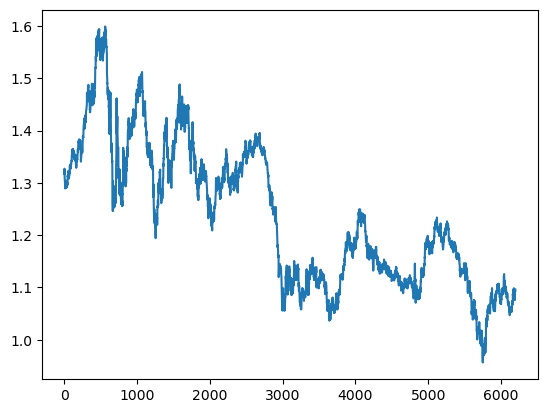

In [35]:
import matplotlib.pyplot as plt

plt.plot(datumi, vrednosti)

### XML najdemo povsod

Če znamo brati XML, znamo prebrati skoraj vse.

Ste že kdaj načrtovali kakšno pot in dobili datoteko .gpx? Ali pa opravili kakšno pot in jo shranili na Stravi ali čem podobnem? Tudi to lahko izvozite v GPX. GPX je XML v določeni standardizirani obliki.

Takole vam Strava shrani vaš tek. Vsebuje podatke o času lokaciji in nadmorski višini, zraven pa tudi vse, kar beleži vaša ura (ali karkoli že, s čimer med tekom in po njem hranite svoj ego).

```xml
<?xml version="1.0" encoding="UTF-8"?>
<gpx creator="StravaGPX" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.topografix.com/GPX/1/1 http://www.topografix.com/GPX/1/1/gpx.xsd http://www.garmin.com/xmlschemas/GpxExtensions/v3 http://www.garmin.com/xmlschemas/GpxExtensionsv3.xsd http://www.garmin.com/xmlschemas/TrackPointExtension/v1 http://www.garmin.com/xmlschemas/TrackPointExtensionv1.xsd" version="1.1" xmlns="http://www.topografix.com/GPX/1/1" xmlns:gpxtpx="http://www.garmin.com/xmlschemas/TrackPointExtension/v1" xmlns:gpxx="http://www.garmin.com/xmlschemas/GpxExtensions/v3">
 <metadata>
  <time>2023-12-16T14:22:38Z</time>
 </metadata>
 <trk>
  <name>Dragomelj z repom</name>
  <type>running</type>
  <trkseg>
   <trkpt lat="46.0988580" lon="14.5596710">
    <ele>293.6</ele>
    <time>2023-12-16T14:24:24Z</time>
    <extensions>
     <power>404</power>
     <gpxtpx:TrackPointExtension>
      <gpxtpx:atemp>25</gpxtpx:atemp>
      <gpxtpx:hr>140</gpxtpx:hr>
      <gpxtpx:cad>82</gpxtpx:cad>
     </gpxtpx:TrackPointExtension>
    </extensions>
   </trkpt>
   <trkpt lat="46.0988890" lon="14.5596830">
    <ele>293.6</ele>
    <time>2023-12-16T14:24:25Z</time>
    <extensions>
     <power>408</power>
     <gpxtpx:TrackPointExtension>
      <gpxtpx:atemp>25</gpxtpx:atemp>
      <gpxtpx:hr>141</gpxtpx:hr>
      <gpxtpx:cad>81</gpxtpx:cad>
     </gpxtpx:TrackPointExtension>
    </extensions>
   </trkpt>
   <trkpt lat="46.0989220" lon="14.5597030">
    <ele>293.8</ele>
    <time>2023-12-16T14:24:26Z</time>
    <extensions>
```

Datoteke svg, v katere shranjujemo slike v vektorski obliki, so XML.

```xml
<?xml version="1.0" encoding="utf-8"?>
<!-- Generator: Adobe Illustrator 24.0.2, SVG Export Plug-In . SVG Version: 6.00 Build 0)  -->
<svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px"
	 viewBox="0 0 595.28 841.89" style="enable-background:new 0 0 595.28 841.89;" xml:space="preserve">
<style type="text/css">
	.st0{fill:#FF0001;stroke:#000000;stroke-width:3;stroke-miterlimit:10;}
	.st1{fill:none;stroke:#018837;stroke-width:10;stroke-linecap:round;stroke-miterlimit:10;}
</style>
<ellipse class="st0" cx="232.21" cy="251.29" rx="56.79" ry="20.71"/>
<path class="st1" d="M59.71,201.29l70,191.43c117.14,5.71,131.43-111.43,117.14,5.71c-14.29,117.14,110,61.43,109.29,43.57"/>
</svg>
```

Kanali RSS pošiljajo podatke v obliki XML. Na https://img.rtvslo.si/feeds/00.xml izvenimo, da so zasnežili Krvavec, da so Rijskmuseumu pripravili razstavo Fransa Halsa in da se je v Murski Soboti nekdo skozi žep ustrelil v nogo.

```xml
<?xml version="1.0" encoding="utf-8"?>
<?xml-stylesheet title="XSL_formatting" type="text/xsl" href="https://img.rtvslo.si/_up/export/rss/rss.xsl"?>
<rss version="2.0">
	<channel>
		<title>MMC RTV - Vse novice</title>
		<item>
			<title>Zagon nove šestsedežnice odprl smučarsko sezono na Krvavcu</title>
			<pubDate>Wed, 27 Dec 2023 15:28:48 +0100</pubDate>
			<link>https://www.rtvslo.si/zabava-in-slog/ture-avanture/zagon-nove-sestsedeznice-odprl-smucarsko-sezono-na-krvavcu/692950</link>
			<enclosure url="https://img.rtvcdn.si/_up/upload/2023/12/27/66145453.jpg" length="5120394" type="image/jpeg"/>

			<description><![CDATA[Na Krvavcu, kjer so umetno zasnežili strmine, se je začela smučarska sezona.  Otvoritev je pospremilo tudi odprtje nove, hitrejše in ogrevane šestsedežnice Zvoh, ki je zamenjala 40 let staro dvosedežnico. ]]></description>
		</item>
		<item>
			<title>Frans Hals, mojster nizozemskega meščanskega realizma, se predstavi v Rijksmuseumu</title>
			<pubDate>Wed, 27 Dec 2023 14:15:47 +0100</pubDate>
			<link>https://www.rtvslo.si/kultura/vizualna-umetnost/frans-hals-mojster-nizozemskega-mescanskega-realizma-se-predstavi-v-rijksmuseumu/692952</link>
			<enclosure url="https://img.rtvcdn.si/_up/upload/2023/12/27/66145422.jpg" length="546109" type="image/jpeg"/>

			<description><![CDATA[V amsterdamskem Rijksmuseumu za februar napovedujejo razstavo Frans Hals – Veliko pred svojim časom.  Hals, ki je bil izjemno produktiven, inovativen, zabaven in tudi nekoliko grob v svojih delih, je bil eden od slikarjev, ki so zaznamovali 17.  stoletje. ]]></description>
		</item>
		<item>
			<title>V hlačni žep trenirke vtaknil pištolo in se ustrelil v nogo</title>
			<pubDate>Wed, 27 Dec 2023 13:15:56 +0100</pubDate>
			<link>https://www.rtvslo.si/crna-kronika/v-hlacni-zep-trenirke-vtaknil-pistolo-in-se-ustrelil-v-nogo/692945</link>
			<enclosure url="https://img.rtvcdn.si/_up/upload/2021/09/27/65927267.jpg" length="732130" type="image/jpeg"/>

			<description><![CDATA[Na območju Murske Sobote je v torek malo po 18.  uri 78-letni moški pri pospravljanju orožja pištolo vtaknil v hlačni žep trenirke in se pri tem ustrelil v nogo, so sporočili murskosoboški policisti. ]]></description>
		</item>
```

ARSO v obliki XML objavlja vremensko napoved. To je najbrž prijazno do avtorjev raznih aplikacij za telefone, ki zajemajo podatke z njihove spletne strani.

Celo če preimenujemo datoteko .xlsx ali .docx v zip in jo odzipamo, v njej najdemo XMLje, ki vsebujejo naše besedilo in njegovo oblikovanje.